## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 1 : Descriptive and Infrential statastics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## imports

In [560]:
import pandas
import numpy
import statistics
import scipy.stats
import matplotlib.pyplot as pyplot
import warnings

## Configurations

In [561]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

In [562]:
warnings.filterwarnings('ignore')

In [563]:
Data=pandas.read_csv("../Data/Day_Wise_Data/24_01_2023_WorldWide.csv")

In [564]:
Data.columns

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [565]:
Selected_Columns=['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths','population']

In [566]:
Data=Data[Selected_Columns]

In [567]:
Numerical_Columns=Data.describe().columns

In [568]:
Numerical_Columns

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population'], dtype='object')

In [569]:
Data=Data.sort_values(by="total_cases",ascending=False)

# Data Exploration

In [570]:
Data

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
233,OWID_WRL,NaN,World,2023-01-22,668733361.0,113854.0,6738373.0,596.0,7.975105e+09
91,OWID_HIC,NaN,High income,2023-01-22,425491330.0,103546.0,2827543.0,479.0,1.250515e+09
69,OWID_EUR,NaN,Europe,2023-01-22,246186845.0,8048.0,2017517.0,77.0,7.448078e+08
11,OWID_ASI,NaN,Asia,2023-01-22,208112874.0,98295.0,1529509.0,451.0,4.721383e+09
70,OWID_EUN,NaN,European Union,2023-01-22,182675923.0,1875.0,1203184.0,29.0,4.501468e+08
...,...,...,...,...,...,...,...,...,...
107,JEY,Europe,Jersey,2023-01-15,NaN,NaN,NaN,NaN,1.107960e+05
158,OWID_CYN,Asia,Northern Cyprus,2023-01-22,NaN,NaN,NaN,NaN,3.828360e+05
159,OWID_NIR,Europe,Northern Ireland,2023-01-18,NaN,NaN,NaN,NaN,1.896000e+06
186,OWID_SCT,Europe,Scotland,2023-01-16,NaN,NaN,NaN,NaN,5.466000e+06


In [571]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 233 to 231
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso_code           237 non-null    object 
 1   continent          224 non-null    object 
 2   location           237 non-null    object 
 3   last_updated_date  237 non-null    object 
 4   total_cases        231 non-null    float64
 5   new_cases          231 non-null    float64
 6   total_deaths       227 non-null    float64
 7   new_deaths         227 non-null    float64
 8   population         236 non-null    float64
dtypes: float64(5), object(4)
memory usage: 18.5+ KB


In [572]:
Data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,2.310000e+02,231.000000,2.270000e+02,227.000000,2.360000e+02
mean,1.237045e+07,2756.844156,1.240378e+05,27.453744,1.371974e+08
std,5.904509e+07,13233.706619,5.678231e+05,120.947774,6.832297e+08
min,1.000000e+00,0.000000,1.000000e+00,0.000000,8.080000e+02
25%,3.212350e+04,0.000000,2.975000e+02,0.000000,8.297690e+05
50%,2.859580e+05,0.000000,3.164000e+03,0.000000,6.909971e+06
75%,2.174932e+06,313.500000,2.049000e+04,2.000000,3.353106e+07
max,6.687334e+08,113854.000000,6.738373e+06,1377.000000,7.975105e+09


In [573]:
Data.describe(include="all")

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
count,237,224,237,237,2.310000e+02,231.000000,2.270000e+02,227.000000,2.360000e+02
unique,237,6,237,6,NaN,NaN,NaN,NaN,NaN
top,OWID_WRL,Africa,World,2023-01-22,NaN,NaN,NaN,NaN,NaN
freq,1,55,1,225,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.237045e+07,2756.844156,1.240378e+05,27.453744,1.371974e+08
std,NaN,NaN,NaN,NaN,5.904509e+07,13233.706619,5.678231e+05,120.947774,6.832297e+08
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,1.000000e+00,0.000000,8.080000e+02
25%,NaN,NaN,NaN,NaN,3.212350e+04,0.000000,2.975000e+02,0.000000,8.297690e+05
50%,NaN,NaN,NaN,NaN,2.859580e+05,0.000000,3.164000e+03,0.000000,6.909971e+06
75%,NaN,NaN,NaN,NaN,2.174932e+06,313.500000,2.049000e+04,2.000000,3.353106e+07


## Data Reduction

here some countries have NULL Values in their specific columns, so dropping the columns without filling it

In [574]:
Data.isnull().any()

iso_code             False
continent             True
location             False
last_updated_date    False
total_cases           True
new_cases             True
total_deaths          True
new_deaths            True
population            True
dtype: bool

In [575]:
Data.isnull().sum()

iso_code              0
continent            13
location              0
last_updated_date     0
total_cases           6
new_cases             6
total_deaths         10
new_deaths           10
population            1
dtype: int64

In [576]:
Data=Data.dropna()

In [577]:
Data

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
223,USA,North America,United States,2023-01-22,102005805.0,2715.0,1104118.0,15.0,3.382899e+08
96,IND,Asia,India,2023-01-22,44683239.0,94.0,530735.0,2.0,1.417173e+09
75,FRA,Europe,France,2023-01-22,39516793.0,4475.0,163821.0,44.0,6.781300e+07
80,DEU,Europe,Germany,2023-01-23,37668384.0,8866.0,164703.0,118.0,8.336984e+07
29,BRA,South America,Brazil,2023-01-22,36718053.0,552.0,696257.0,3.0,2.153135e+08
...,...,...,...,...,...,...,...,...,...
126,MAC,Asia,Macao,2023-01-22,3468.0,6.0,117.0,1.0,6.951800e+05
232,WLF,Oceania,Wallis and Futuna,2023-01-22,3427.0,0.0,7.0,0.0,1.159600e+04
180,SPM,North America,Saint Pierre and Miquelon,2023-01-22,3411.0,0.0,2.0,0.0,5.885000e+03
142,MSR,North America,Montserrat,2023-01-22,1403.0,0.0,8.0,0.0,4.413000e+03


In [578]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 223 to 156
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso_code           214 non-null    object 
 1   continent          214 non-null    object 
 2   location           214 non-null    object 
 3   last_updated_date  214 non-null    object 
 4   total_cases        214 non-null    float64
 5   new_cases          214 non-null    float64
 6   total_deaths       214 non-null    float64
 7   new_deaths         214 non-null    float64
 8   population         214 non-null    float64
dtypes: float64(5), object(4)
memory usage: 16.7+ KB


In [579]:
Data.describe(include="all")

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
count,214,214,214,214,2.140000e+02,214.00000,2.140000e+02,214.000000,2.140000e+02
unique,214,6,214,2,NaN,NaN,NaN,NaN,NaN
top,USA,Africa,United States,2023-01-22,NaN,NaN,NaN,NaN,NaN
freq,1,54,1,207,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.124886e+06,1371.00000,3.148765e+04,20.630841,3.721731e+07
std,NaN,NaN,NaN,NaN,9.690128e+06,6171.86927,1.064096e+05,110.043223,1.426430e+08
min,NaN,NaN,NaN,NaN,1.000000e+00,0.00000,1.000000e+00,0.000000,4.413000e+03
25%,NaN,NaN,NaN,NaN,3.308325e+04,0.00000,2.832500e+02,0.000000,8.515890e+05
50%,NaN,NaN,NaN,NaN,2.688990e+05,0.00000,2.795000e+03,0.000000,6.797150e+06
75%,NaN,NaN,NaN,NaN,1.491256e+06,197.75000,1.669275e+04,0.750000,2.620034e+07


In [580]:
Data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,2.140000e+02,214.00000,2.140000e+02,214.000000,2.140000e+02
mean,3.124886e+06,1371.00000,3.148765e+04,20.630841,3.721731e+07
std,9.690128e+06,6171.86927,1.064096e+05,110.043223,1.426430e+08
min,1.000000e+00,0.00000,1.000000e+00,0.000000,4.413000e+03
25%,3.308325e+04,0.00000,2.832500e+02,0.000000,8.515890e+05
50%,2.688990e+05,0.00000,2.795000e+03,0.000000,6.797150e+06
75%,1.491256e+06,197.75000,1.669275e+04,0.750000,2.620034e+07
max,1.020058e+08,64450.00000,1.104118e+06,1377.000000,1.425887e+09


## Mean

In [581]:
Data.mean()

total_cases     3.124886e+06
new_cases       1.371000e+03
total_deaths    3.148765e+04
new_deaths      2.063084e+01
population      3.721731e+07
dtype: float64

## Median

In [582]:
Data.median()

total_cases      268899.0
new_cases             0.0
total_deaths       2795.0
new_deaths            0.0
population      6797149.5
dtype: float64

## Mode

In [583]:
Data.mode()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
0,ABW,Africa,Afghanistan,2023-01-22,1.0,0.0,2.0,0.0,4.413000e+03
1,AFG,NaN,Albania,NaN,1403.0,NaN,21.0,NaN,5.885000e+03
2,AGO,NaN,Algeria,NaN,3411.0,NaN,38.0,NaN,1.159600e+04
3,AIA,NaN,Andorra,NaN,3427.0,NaN,138.0,NaN,1.269100e+04
4,ALB,NaN,Angola,NaN,3468.0,NaN,238.0,NaN,1.587700e+04
...,...,...,...,...,...,...,...,...,...
209,WSM,NaN,Vietnam,NaN,36718053.0,NaN,NaN,NaN,2.358249e+08
210,YEM,NaN,Wallis and Futuna,NaN,37668384.0,NaN,NaN,NaN,2.755013e+08
211,ZAF,NaN,Yemen,NaN,39516793.0,NaN,NaN,NaN,3.382899e+08
212,ZMB,NaN,Zambia,NaN,44683239.0,NaN,NaN,NaN,1.417173e+09


## Quantile Ranges

In [584]:
Data.quantile(0.25)

total_cases      33083.25
new_cases            0.00
total_deaths       283.25
new_deaths           0.00
population      851589.00
Name: 0.25, dtype: float64

In [585]:
Data.quantile(0.75)

total_cases      1491255.75
new_cases            197.75
total_deaths       16692.75
new_deaths             0.75
population      26200339.00
Name: 0.75, dtype: float64

In [586]:
Inter_quartile_range=Data.quantile(0.75)-Data.quantile(0.25)

In [587]:
Inter_quartile_range

total_cases      1458172.50
new_cases            197.75
total_deaths       16409.50
new_deaths             0.75
population      25348750.00
dtype: float64

In [588]:
Data[Numerical_Columns]

,total_cases,new_cases,total_deaths,new_deaths,population
223,102005805.0,2715.0,1104118.0,15.0,3.382899e+08
96,44683239.0,94.0,530735.0,2.0,1.417173e+09
75,39516793.0,4475.0,163821.0,44.0,6.781300e+07
80,37668384.0,8866.0,164703.0,118.0,8.336984e+07
29,36718053.0,552.0,696257.0,3.0,2.153135e+08
...,...,...,...,...,...
126,3468.0,6.0,117.0,1.0,6.951800e+05
232,3427.0,0.0,7.0,0.0,1.159600e+04
180,3411.0,0.0,2.0,0.0,5.885000e+03
142,1403.0,0.0,8.0,0.0,4.413000e+03


In [589]:
len(Data.max()[4:])

5

## Harmonic Mean

In [590]:
statistics.harmonic_mean(Data[Numerical_Columns[3]])

0

In [591]:
[
    Numerical_Columns[i]+": "+str(statistics.harmonic_mean(Data[Numerical_Columns[i]])) for i in range(len(Numerical_Columns))
]

['total_cases: 212.56921925839814',
 'new_cases: 0',
 'total_deaths: 60.63119477286878',
 'new_deaths: 0',
 'population: 171183.99294536182']

## Geometric Mean

In [592]:
scipy.stats.mstats.gmean(Data[Numerical_Columns[3]])

0.0

In [593]:
[
    Numerical_Columns[i]+": "+str(scipy.stats.mstats.gmean(Data[Numerical_Columns[i]]))  for i in range(len(Numerical_Columns))
]

['total_cases: 246862.64083075',
 'new_cases: 0.0',
 'total_deaths: 2105.079222511208',
 'new_deaths: 0.0',
 'population: 4224812.6670721555']

## Skewness

In [594]:
Data.skew()

total_cases     6.451550
new_cases       8.001820
total_deaths    6.884670
new_deaths      9.761294
population      8.765136
dtype: float64

## Kurtosis

In [595]:
Data.kurtosis()

total_cases      54.407902
new_cases        72.233026
total_deaths     57.591278
new_deaths      111.779968
population       82.817356
dtype: float64

## Box Plots

<AxesSubplot: >

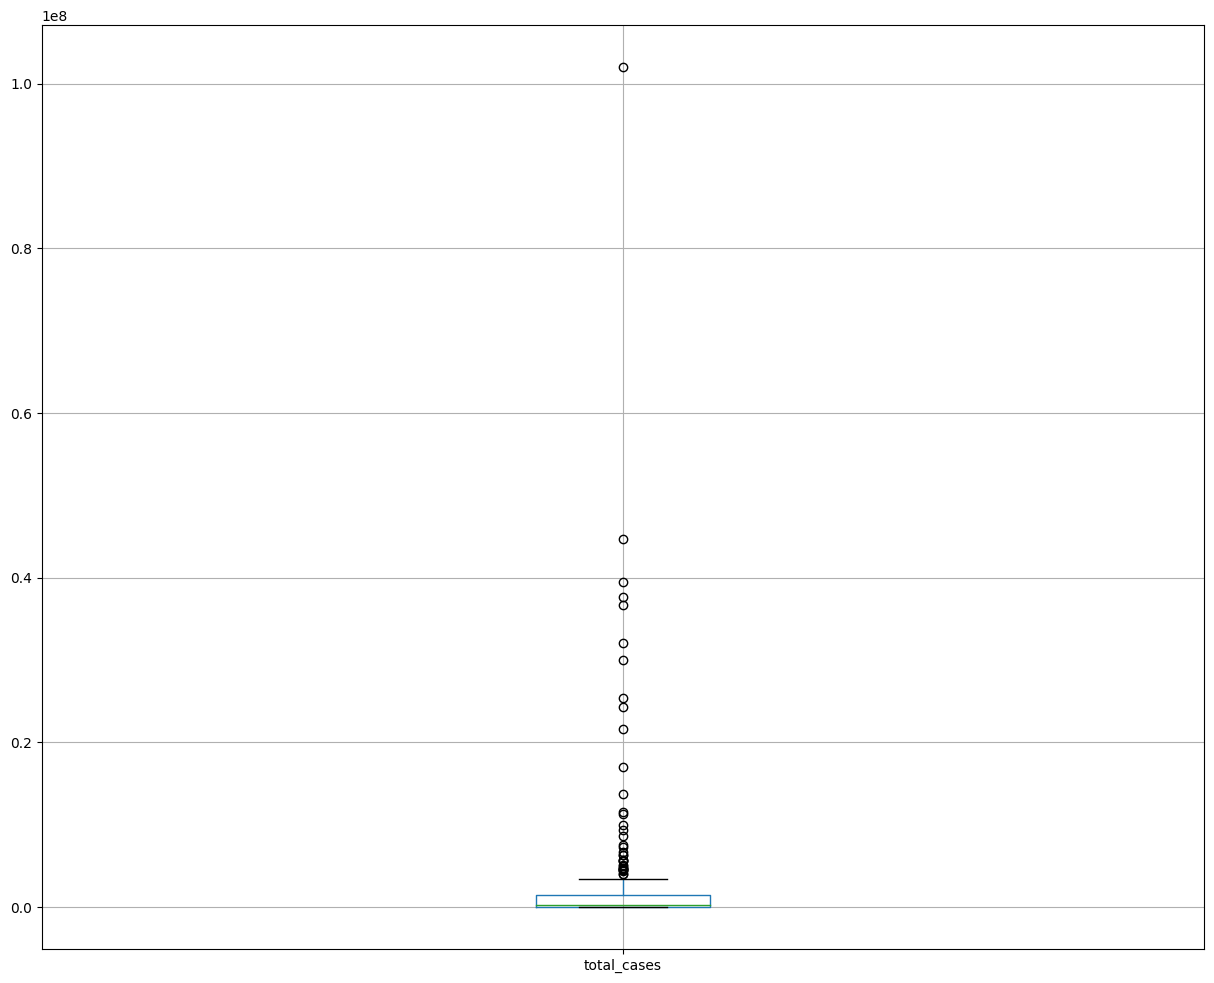

In [596]:
Data.boxplot("total_cases")

<AxesSubplot: >

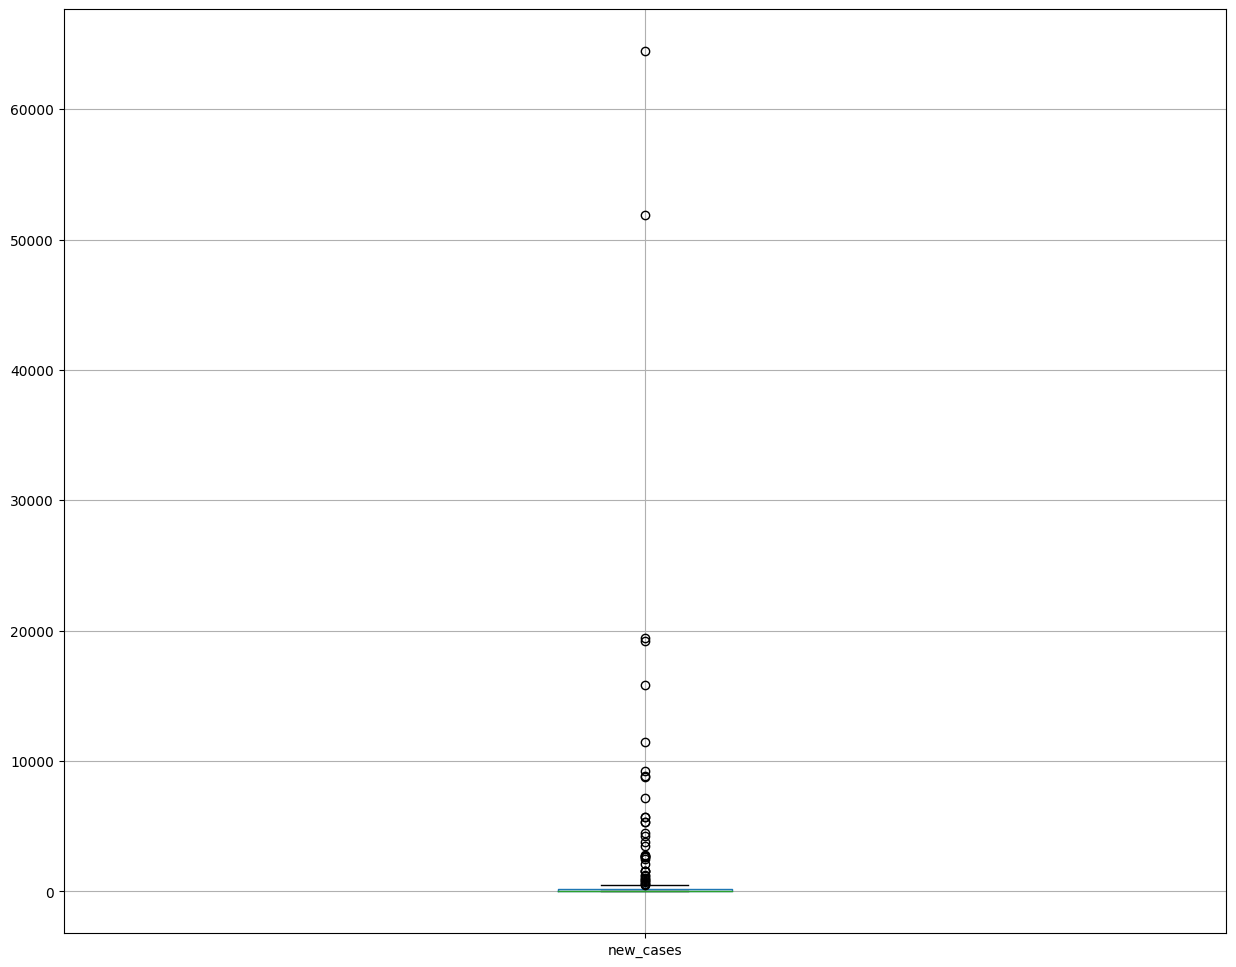

In [597]:
Data.boxplot('new_cases')

<AxesSubplot: >

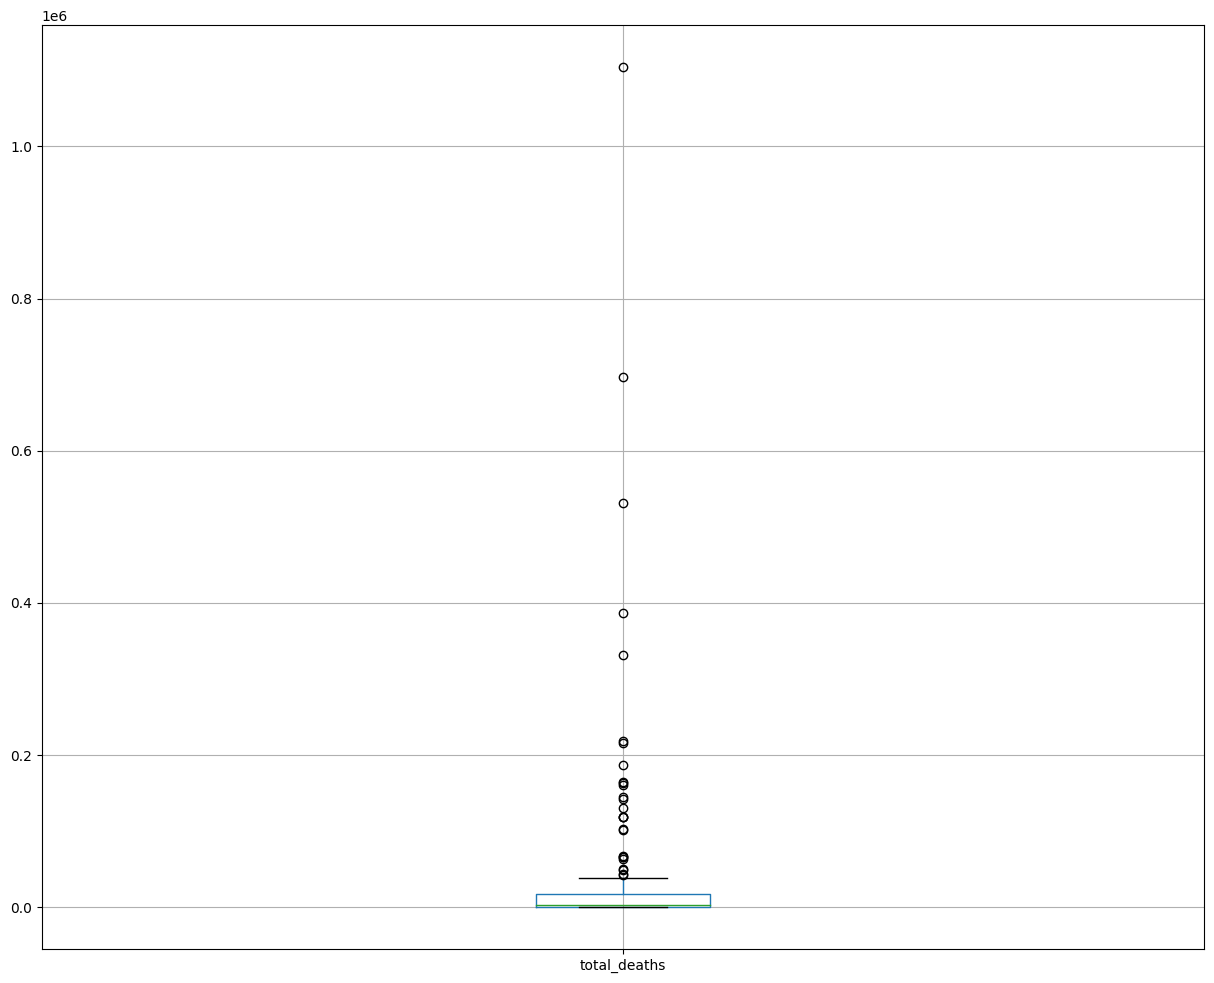

In [598]:
Data.boxplot("total_deaths")

<AxesSubplot: >

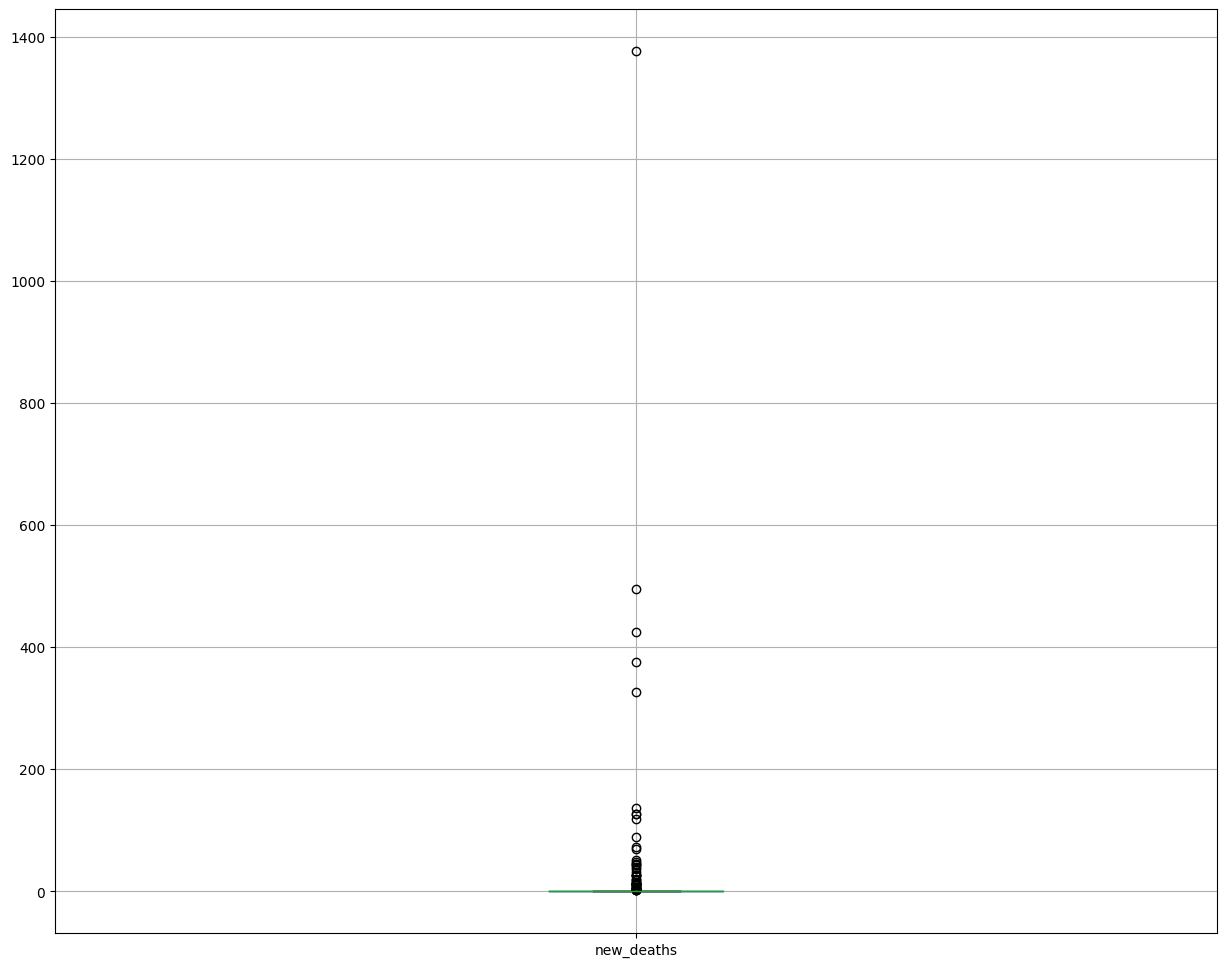

In [599]:
Data.boxplot("new_deaths")

<AxesSubplot: >

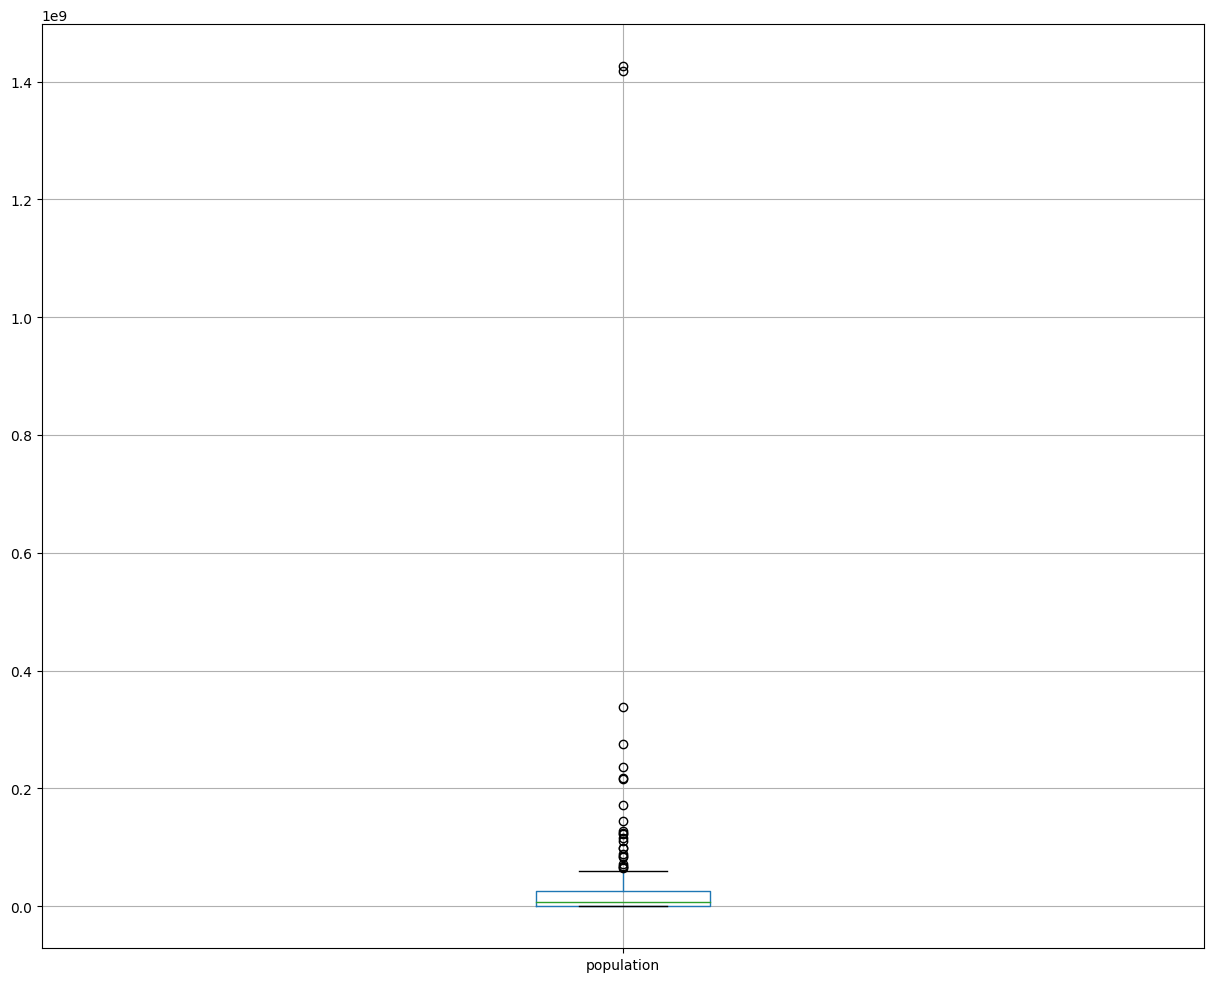

In [600]:
Data.boxplot("population")

<AxesSubplot: >

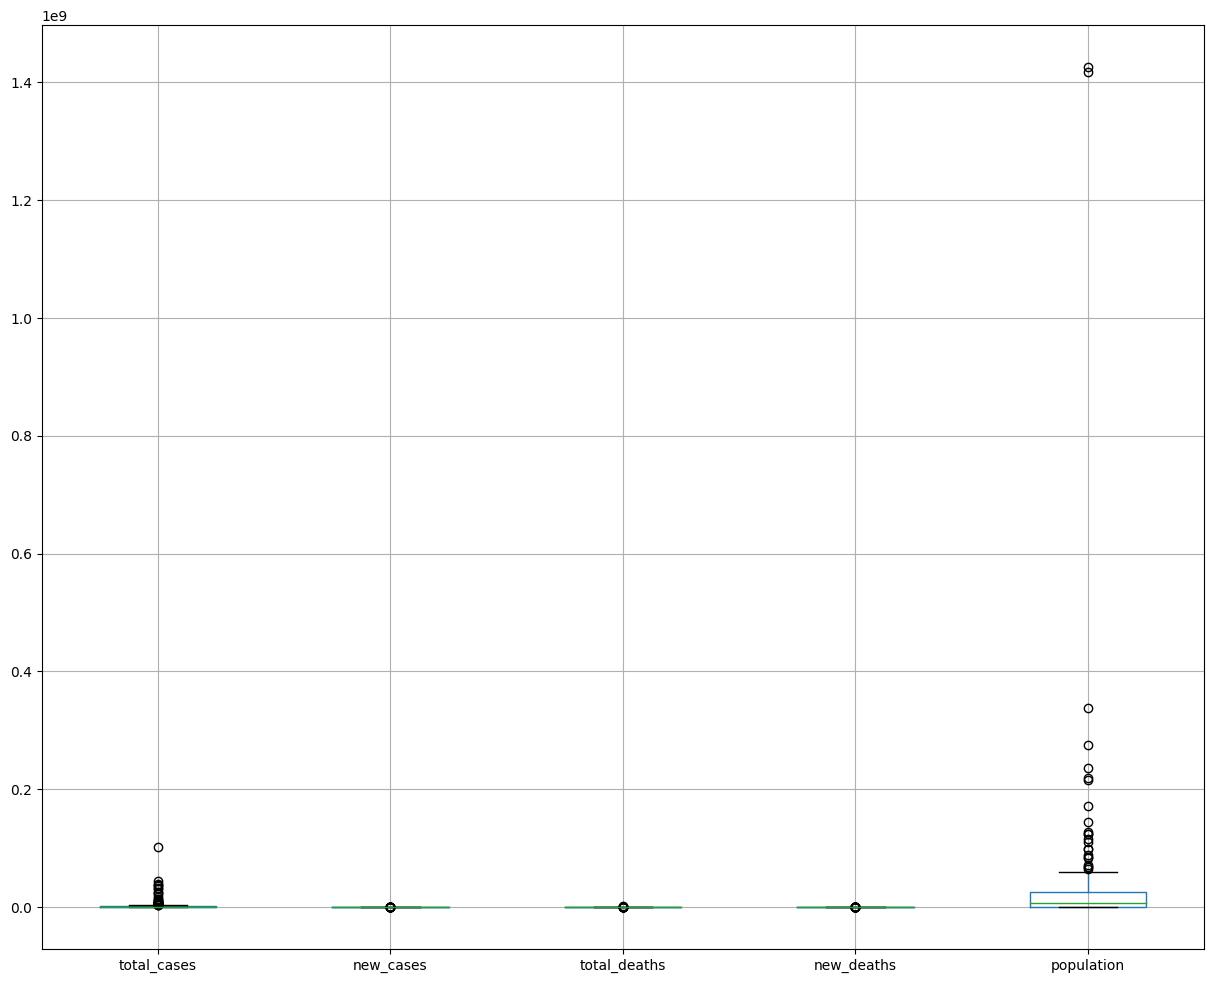

In [601]:
Data.boxplot()

## Bar Graph

In [602]:
len(list(Data['location']))

214

<AxesSubplot: xlabel='location'>

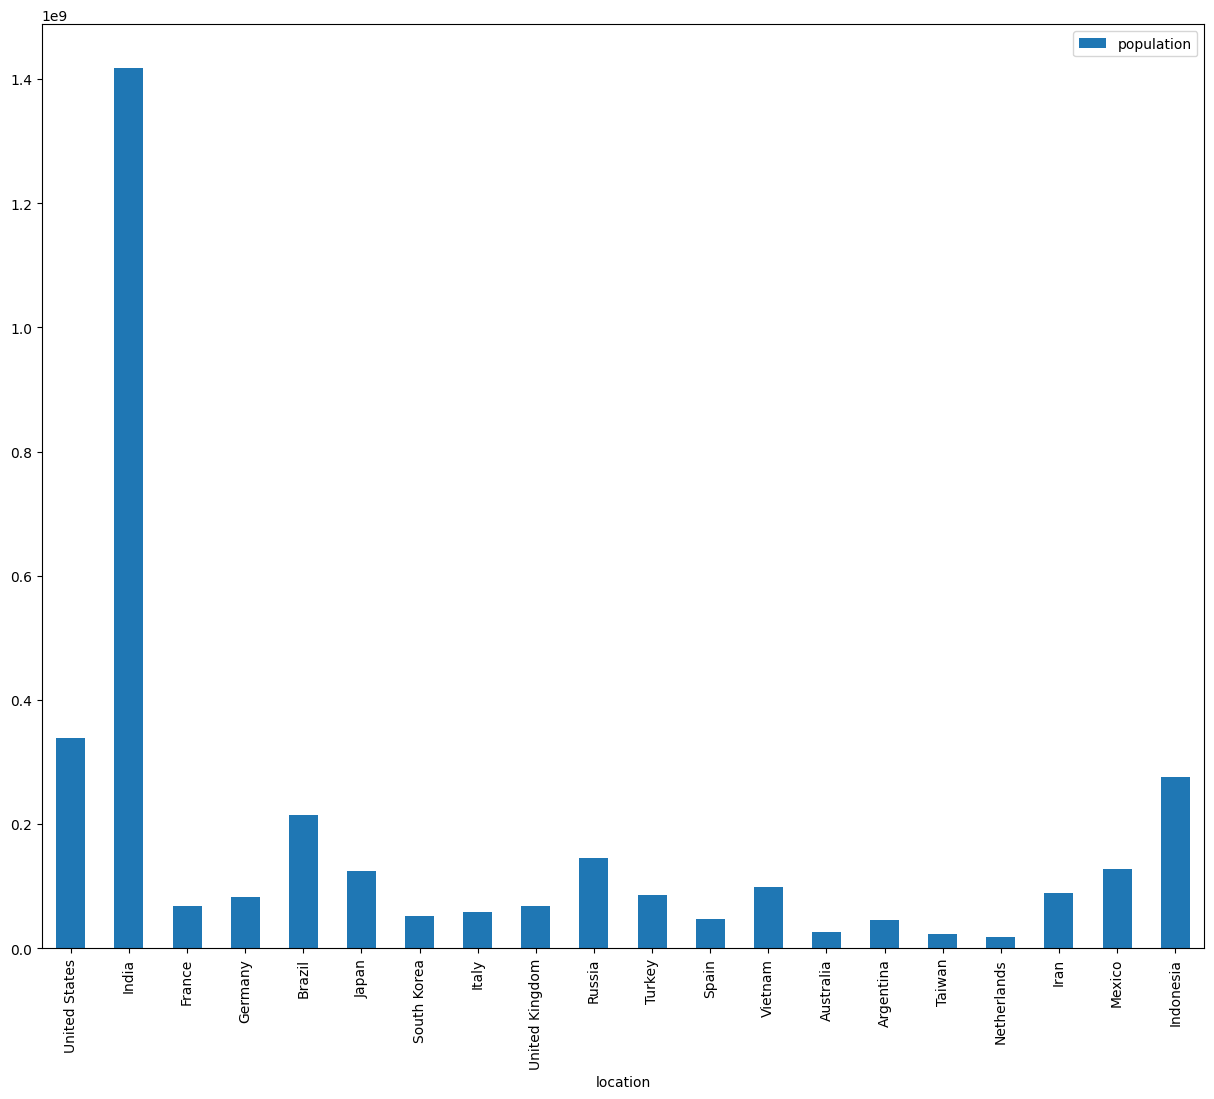

In [603]:
Data[:20].plot.bar(x='location',y=['population'])

## PieChart

([<matplotlib.patches.Wedge at 0x1b441f13df0>,
 [Text(0.902675499700883, 0.6286310064256785, 'United States'),
  Text(0.09635153547502993, 1.095772048197801, 'India'),
  Text(-0.4429271471031747, 1.0068840759288245, 'France'),
  Text(-0.8440974764867609, 0.7053364092322771, 'Germany'),
  Text(-1.0651262925991594, 0.27478351627048186, 'Brazil'),
  Text(-1.0863458234387264, -0.17277948922610972, 'Japan'),
  Text(-0.9502440735065006, -0.5541084738259942, 'South Korea'),
  Text(-0.7189805933953971, -0.8325064001680724, 'Italy'),
  Text(-0.44463609412452015, -1.0061305798959155, 'United Kingdom'),
  Text(-0.1564660858825244, -1.088815119278109, 'Russia'),
  Text(0.09627229450421496, -1.0957790129907097, 'Turkey'),
  Text(0.2945725031189192, -1.0598240610621437, 'Spain'),
  Text(0.4502174894860681, -1.0036454613860724, 'Vietnam'),
  Text(0.5821089120101351, -0.933353745671156, 'Australia'),
  Text(0.695649191762189, -0.8520987043767955, 'Argentina'),
  Text(0.7892094868578992, -0.76625608373

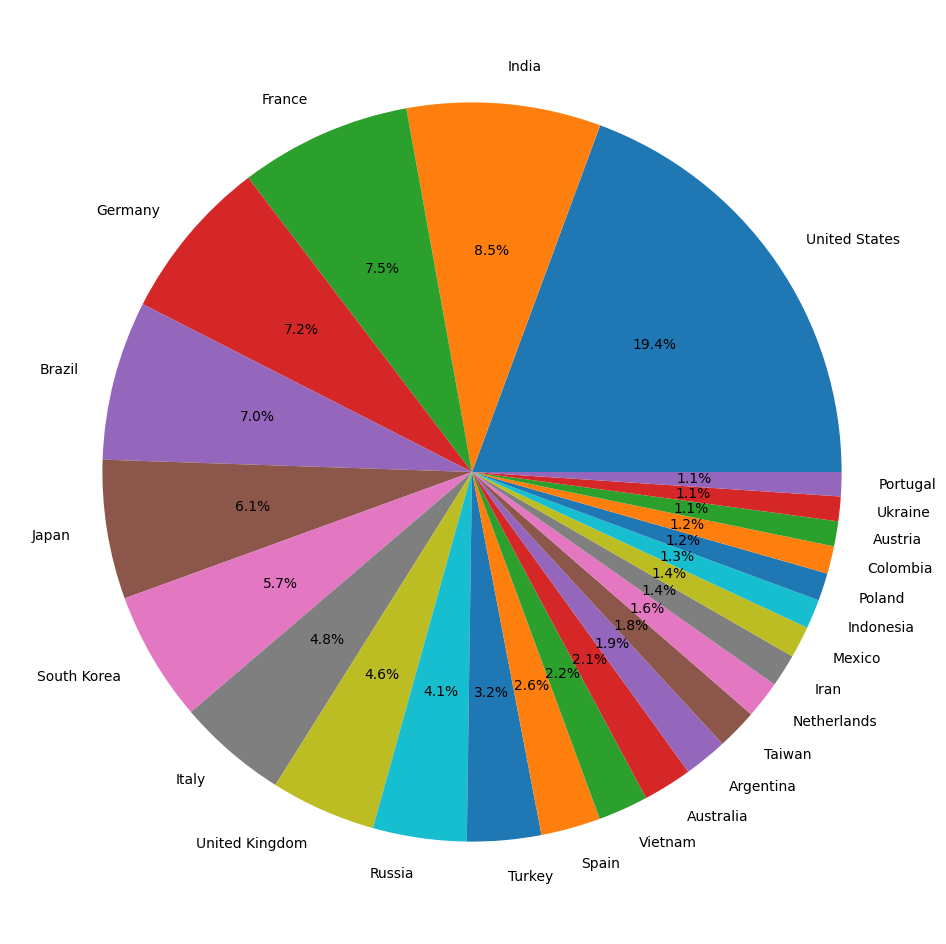

In [604]:
# Data[:25].plot(kind="pie",y='total_cases',label='location')
pyplot.pie(Data[:25]['total_cases'],labels=Data[:25]['location'],autopct='%1.1f%%')

## Line Graph

<AxesSubplot: xlabel='location'>

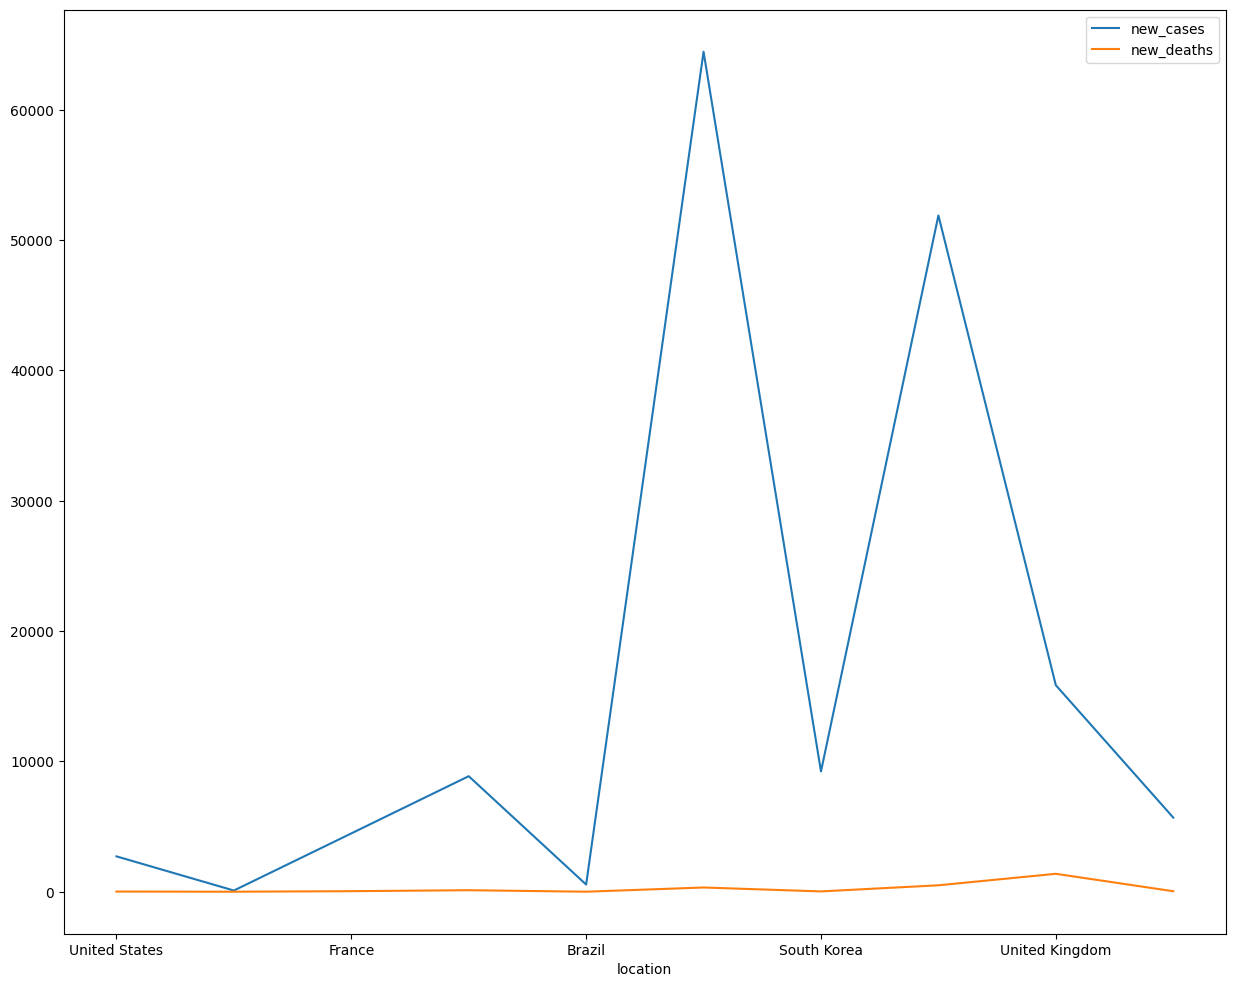

In [605]:
Data[:10].plot(kind="line",x='location',y=['new_cases','new_deaths'])

<AxesSubplot: xlabel='location'>

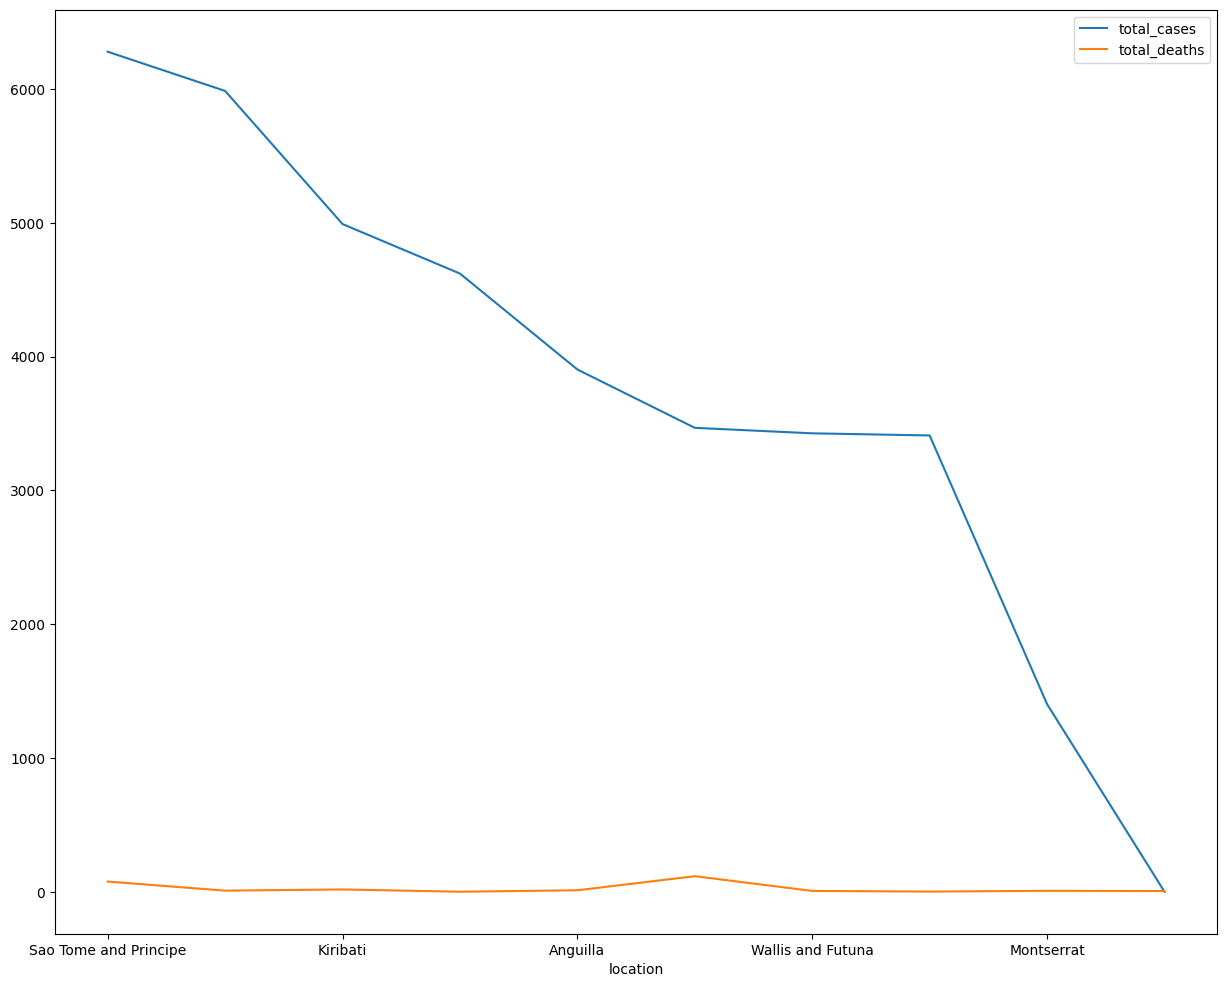

In [606]:
Data[-10:].plot(kind="line",x='location',y=['total_cases','total_deaths'])

## Correlation

In [607]:
Correlation_Data=Data.corr()
Correlation_Data.columns=["correlation_with_"+column for column in Numerical_Columns]

In [608]:
Correlation_Data

,correlation_with_total_cases,correlation_with_new_cases,correlation_with_total_deaths,correlation_with_new_deaths,correlation_with_population
total_cases,1.000000,0.383449,0.876161,0.283189,0.386470
new_cases,0.383449,1.000000,0.165865,0.520419,0.042690
total_deaths,0.876161,0.165865,1.000000,0.182481,0.417551
new_deaths,0.283189,0.520419,0.182481,1.000000,0.023063
population,0.386470,0.042690,0.417551,0.023063,1.000000


## Covariance

In [609]:
Covarience_data=Data.cov()
Covarience_data.columns=["covarience_with_"+column for column in Numerical_Columns]

In [610]:
Covarience_data

,covarience_with_total_cases,covarience_with_new_cases,covarience_with_total_deaths,covarience_with_new_deaths,covarience_with_population
total_cases,9.389858e+13,2.293260e+10,9.034295e+11,3.019734e+08,5.341899e+14
new_cases,2.293260e+10,3.809197e+07,1.089309e+08,3.534544e+05,3.758342e+10
total_deaths,9.034295e+11,1.089309e+08,1.132299e+10,2.136790e+06,6.337833e+12
new_deaths,3.019734e+08,3.534544e+05,2.136790e+06,1.210951e+04,3.620139e+08
population,5.341899e+14,3.758342e+10,6.337833e+12,3.620139e+08,2.034704e+16


# Gathering All Values Together

In [611]:
Statastics_Data=pandas.DataFrame()

In [612]:
Statastics_Data.columns

Index([], dtype='object')

In [613]:
Statastics_Data['mean']=Data.mean()

In [614]:
Statastics_Data['median']=Data.median()

In [615]:
Statastics_Data['skew']=Data.skew()

In [616]:
Statastics_Data['kurtosis']=Data.kurtosis()

In [617]:
Statastics_Data['first_quartile']=Data.quantile(0.25)

In [618]:
Statastics_Data['third_quartile']=Data.quantile(0.75)

In [619]:
Statastics_Data['inter_quartile_range']=Inter_quartile_range

In [620]:
Data.min()[4:]

total_cases        1.0
new_cases          0.0
total_deaths       1.0
new_deaths         0.0
population      4413.0
dtype: object

In [621]:
Statastics_Data['max']=Data.max()[len(Numerical_Columns)-1:]

In [622]:
Statastics_Data['min']=Data.min()[len(Numerical_Columns)-1:]

In [623]:
Statastics_Data['harmonic_mean']=[
   statistics.harmonic_mean(Data[Numerical_Columns[i]]) for i in range(len(Numerical_Columns))
]

In [624]:
Statastics_Data['geometric_mean']=[
   scipy.stats.mstats.gmean(Data[Numerical_Columns[i]])  for i in range(len(Numerical_Columns))
]

In [625]:
Statastics_Data=pandas.concat([Statastics_Data,Correlation_Data,Covarience_data],axis=1)

In [626]:
Statastics_Data

,mean,median,skew,kurtosis,first_quartile,third_quartile,inter_quartile_range,max,min,harmonic_mean,...,correlation_with_total_cases,correlation_with_new_cases,correlation_with_total_deaths,correlation_with_new_deaths,correlation_with_population,covarience_with_total_cases,covarience_with_new_cases,covarience_with_total_deaths,covarience_with_new_deaths,covarience_with_population
total_cases,3.124886e+06,268899.0,6.451550,54.407902,33083.25,1491255.75,1458172.50,102005805.0,1.0,212.569219,...,1.000000,0.383449,0.876161,0.283189,0.386470,9.389858e+13,2.293260e+10,9.034295e+11,3.019734e+08,5.341899e+14
new_cases,1.371000e+03,0.0,8.001820,72.233026,0.00,197.75,197.75,64450.0,0.0,0.000000,...,0.383449,1.000000,0.165865,0.520419,0.042690,2.293260e+10,3.809197e+07,1.089309e+08,3.534544e+05,3.758342e+10
total_deaths,3.148765e+04,2795.0,6.884670,57.591278,283.25,16692.75,16409.50,1104118.0,1.0,60.631195,...,0.876161,0.165865,1.000000,0.182481,0.417551,9.034295e+11,1.089309e+08,1.132299e+10,2.136790e+06,6.337833e+12
new_deaths,2.063084e+01,0.0,9.761294,111.779968,0.00,0.75,0.75,1377.0,0.0,0.000000,...,0.283189,0.520419,0.182481,1.000000,0.023063,3.019734e+08,3.534544e+05,2.136790e+06,1.210951e+04,3.620139e+08
population,3.721731e+07,6797149.5,8.765136,82.817356,851589.00,26200339.00,25348750.00,1425887360.0,4413.0,171183.992945,...,0.386470,0.042690,0.417551,0.023063,1.000000,5.341899e+14,3.758342e+10,6.337833e+12,3.620139e+08,2.034704e+16


In [627]:
Statastics_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, total_cases to population
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mean                           5 non-null      float64
 1   median                         5 non-null      float64
 2   skew                           5 non-null      float64
 3   kurtosis                       5 non-null      float64
 4   first_quartile                 5 non-null      float64
 5   third_quartile                 5 non-null      float64
 6   inter_quartile_range           5 non-null      float64
 7   max                            5 non-null      object 
 8   min                            5 non-null      object 
 9   harmonic_mean                  5 non-null      float64
 10  geometric_mean                 5 non-null      float64
 11  correlation_with_total_cases   5 non-null      float64
 12  correlation_with_new_cases     5 non-nul

In [628]:
list(Statastics_Data)[:11]

['mean',
 'median',
 'skew',
 'kurtosis',
 'first_quartile',
 'third_quartile',
 'inter_quartile_range',
 'max',
 'min',
 'harmonic_mean',
 'geometric_mean']

In [629]:
Statastics_Data.iloc[1,:]

mean                                         1371.0
median                                          0.0
skew                                        8.00182
kurtosis                                  72.233026
first_quartile                                  0.0
third_quartile                               197.75
inter_quartile_range                         197.75
max                                         64450.0
min                                             0.0
harmonic_mean                                   0.0
geometric_mean                                  0.0
correlation_with_total_cases               0.383449
correlation_with_new_cases                      1.0
correlation_with_total_deaths              0.165865
correlation_with_new_deaths                0.520419
correlation_with_population                 0.04269
covarience_with_total_cases      22932602756.446007
covarience_with_new_cases            38091970.29108
covarience_with_total_deaths        108930915.44601
covarience_w

<AxesSubplot: >

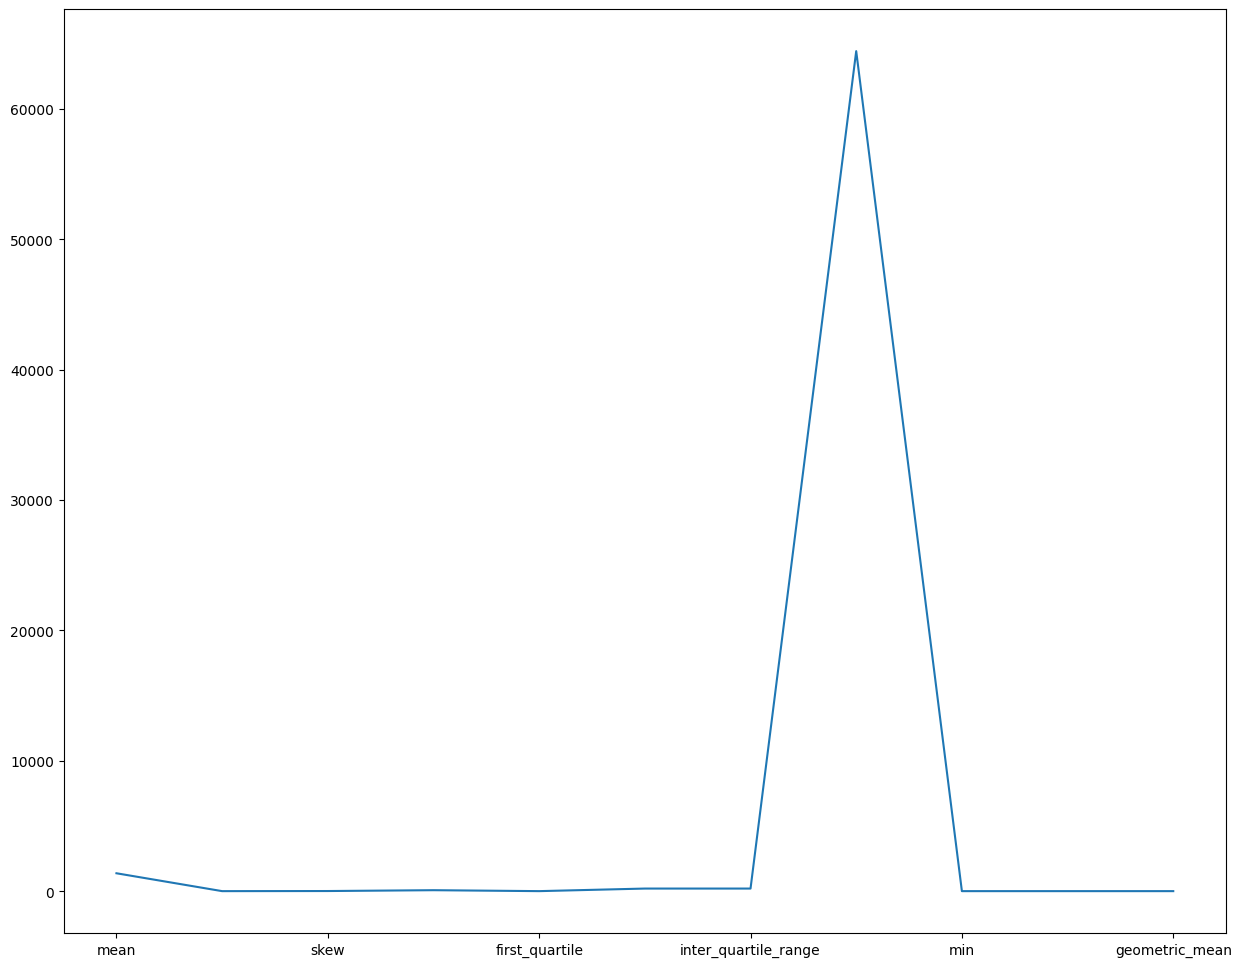

In [630]:
Statastics_Data.iloc[1,:11].plot()